In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("heaps.dat", sep=',', header=None)
df.head()

,0,1
0,33955900.0,17225
1,71991100.0,17177
2,61205900.0,17508
3,64650100.0,17212
4,46053100.0,17645


In [3]:
size = np.array(df.loc[:,0],dtype=float)
print(len(size))

3634


In [4]:
size = df.loc[:,0].values
diffwords = df.loc[:,1].values

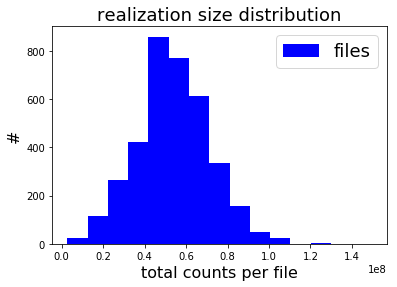

In [5]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', bins = 15, label='files')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [6]:
fig.savefig("sizeDistr.pdf")

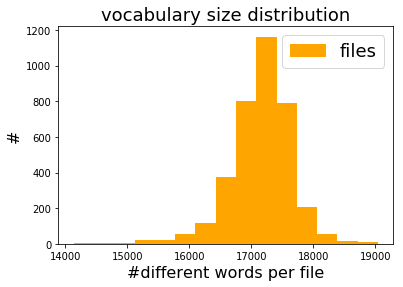

In [7]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', bins = 15, label = 'files')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [8]:
fig.savefig("diffwordsDistr.pdf")

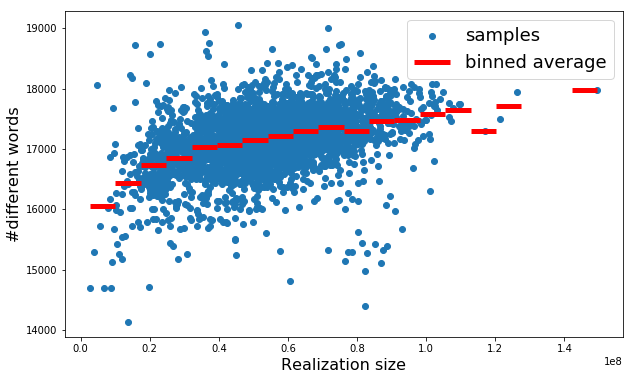

In [9]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='samples')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [10]:
fig.savefig("heaps.pdf")

# null model

In [11]:
df_null = pd.read_csv("heaps_null.dat", sep=',', header=None)
df_null.head()

,0,1
0,33955900.0,18382
1,71991100.0,18619
2,61205900.0,18565
3,64650100.0,18593
4,46053100.0,18472


In [12]:
size_null = df_null.loc[:,0].values
diffwords_null = df_null.loc[:,1].values

In [13]:
len(df_null)

3634

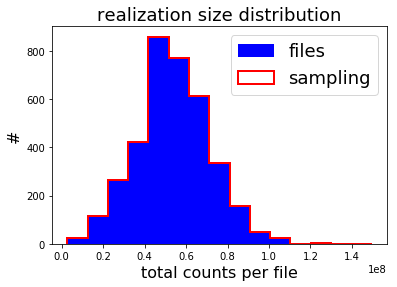

In [14]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', bins = 15, label='files')
plt.hist(size_null, density=False, color='red', lw=2, histtype='step', bins = 15, label='sampling')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [15]:
fig.savefig("sizeDistr_null.pdf")

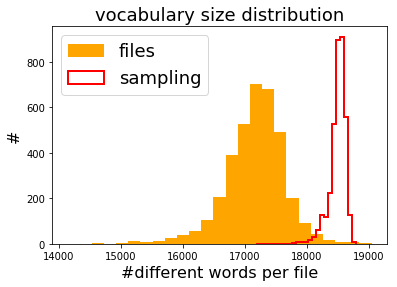

In [16]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', bins = 25, label = 'files')
plt.hist(diffwords_null, density=False, histtype='step', color='red', lw=2, bins = 25, label='sampling')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18, loc='upper left')
plt.show()

In [17]:
fig.savefig("diffwordsDistr_null.pdf")

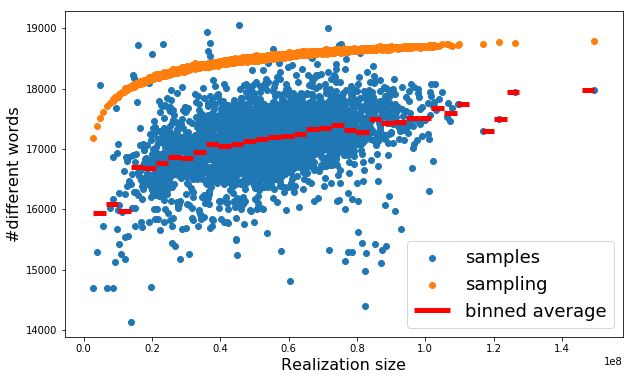

In [18]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='samples')
plt.scatter(size_null, diffwords_null, label='sampling')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=40)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#bin_means_null, bin_edges_null, binnumber_null = stats.binned_statistic(size_null, diffwords_null, statistic='mean', bins=20)
#plt.hlines(bin_means_null, bin_edges_null[:-1], bin_edges_null[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [19]:
fig.savefig("heaps_null.pdf")

## Taylor

In [20]:
bin_vars, _, _ = stats.binned_statistic(size, diffwords,statistic=np.var, bins=40)

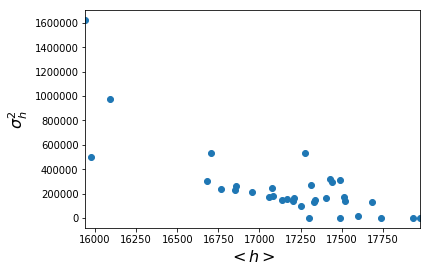

In [28]:
plt.scatter(bin_means, bin_vars)
x = np.arange(np.nanmin(bin_means),np.nanmax(bin_means))
#plt.plot(x,x*x)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim((8e4,2e6))
plt.xlim((x[x.nonzero()].min(),x.max()))
#plt.xticks(np.arange(1.5e4,1.9e4, step=1e3))
plt.xlabel("$<h>$",fontsize=16)
plt.ylabel("$\sigma_h^2$",fontsize=16)
plt.show()